In [1]:
# import all stuff we will need
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from scipy.optimize import fsolve
from scipy.stats import norm
from call_put_bs import call_put_bs
from gbm_d import gbm_d
from hpr_cp import hpr_cp
from yf import yf
from find_beta import find_beta

# 7.1 Payoff of an uncapped capital protection product

The payoff of an uncapped capital protection product written on one underlying is

\begin{equation*}
g(S_T)=kN+\frac{zN}{S_0}\max\{S_T-X,0\}
\end{equation*}

where $k$ is the capital protection and $z$ is the participation (both in multiples of the denomination $N$). In the product described below, we have $k=1.01$ and $z=1$.

<img src="CP_LEON.jpg" alt="Drawing" style="width: 600px;"/>

# 7.2 Replication and pricing

We replicate the payoff $g$. The cash flow $kN$ - which is independent of the performance of the underlying - can be generated by a riskless investment in the money market with continuously compounding interest rate $r$. The present value of this cash flow at time $t\leq T$ is thus

\begin{equation*}
e^{-r(T-t)}kN\;.
\end{equation*}

The term $\frac{zN}{S_0}\max\{S_T-X,0\}$ corresponds to the payoff of

\begin{equation}\label{eq:number_of_calls}
n:=\frac{zN}{S_0}
\end{equation}

call options with strike $X$. Thus, the value $V_{\rm cp}$ of the uncapped capital protection product at time $0\leq t\leq T$ is 

\begin{equation*}
V_{\rm cp}(s,t)=e^{-r(T-t)}kN+\frac{zN}{S_0}V_c(s,t)\;.
\end{equation*}

# 7.3 Capped capital protection

Besides the uncapped capital protection products we find on the market also products with a return cap. This means that above a certain final fixing level $X_2$ of the underlying the return of the product is capped to a fixed value $c$. The payoff of such a product is given by

\begin{equation*}
g(S_T)=kN+\frac{zN}{S_0}\big(\max\{S_T-X_1,0\}-\max\{S_T-X_2,0\}\big)\;,
\end{equation*}

for details see the script. Thus, the value $V_{\rm ccp}$ of a capped capital product is given by 

\begin{equation*}
V_{\rm ccp}(s,t)=e^{-r(T-t)}kN+\frac{zN}{S_0}\big(V_c(s,t;X_1)-V_c(s,t;X_2)\big)\;,
\end{equation*}

where by $V_c(s,t;X)$ we denote value of an european call option with strike $X$. Note that the cap $c$ is given by

\begin{equation*}
c=k-1+\frac{z}{S_0}(X_2-X_1)\;.
\end{equation*}

# 7.4 Capital protection products on multiple underlyings

In [ ]:
We exemplarily consider the capital protection product written on multiple underlyings described in figure below. 

<img src="MCP_LEON_1.jpg" alt="Drawing" style="width: 600px;"/>
<img src="MCP_LEON_2.jpg" alt="Drawing" style="width: 600px;"/>

The payoff of this product is

\begin{equation*}
kN+N\max\bigg\{\min\Big\{1+c-k,z\big(\min_i\frac{S^i_T}{X_i}-\gamma\big)\Big\},0\bigg\}\;,
\end{equation*}

where $X_i=S^i_0$ (details see the script). Thus, the price $V_{{\rm ccp},d}({\bf s},t)$ of a capital protection product with the above payoff is for $t\leq T$ given by

\begin{equation*}
V_{{\rm ccp},d}({\bf s},t) = e^{-r(T-t)}kN+NV_{{\rm cwo},d}({\bf s},t)\;.
\end{equation*}

Herein, we denote by $V_{{\rm cwo},d}({\bf s},t)$ the value of a capped <span style="color:red">worst-of-option</span> on $d$ underlyings with payoff

\begin{equation}\label{eq:payoff_cwo_d}
g({\bf s})=\max\bigg\{\min\Big\{1+c-k,z\big(\min_i\frac{s_i}{X_i}-\gamma\big)\Big\},0\bigg\}\;;
\end{equation}

by the general principles of derivatives pricing discussed in chapter 3 the price of this option is given by the expectation

\begin{equation*}
V_{{\rm cwo},d}({\bf s},t)=e^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}\big[g({\bf S}_T)\mid {\bf S}_t={\bf s}\big]\;.
\end{equation*}

To find this expectation we again model the time evolution of the stock prices ${\bf S}_t$ as a $d$-dimensional geometric Brownian motion; for this model it seems that this expectation can not be calculated analytically and one has to rely on numerical methods.

### Example 7.4

We consider the product written on Nestle $\rightarrow 1$, Novartis $\rightarrow 2$, Roche $\rightarrow 3$, Swiss Re $\rightarrow 4$ and Zurich $\rightarrow 5$ described in the above term sheet and check the issue price $V_{{\rm cp},5}= 1000$ CHF.

The initial stock prices $\textbf{S}_0=(S_0^1,\ldots,S_0^5)$ are from the term sheet; to estimate the dividend yields $q_i=\ln(1+D_i/S_0^i)$ we take the dividends payments made in $2019$, thus $(D_1,D_2,D_3,D_4,D_5)=(2.45,2.89,8.7,5.2,19.33)$. The risk free is taken from the term sheet ("Bondfloor at issuance") as $79.52e^{rT}=80$ $\Rightarrow$ $r=\frac{1}{T}\ln(80/79.52)$. We take the implied volatilities 

\begin{equation*}
\boldsymbol{\sigma}^{\textrm{i}}=\textrm{diag}(0.1703,0.1817,0.1765,0.1901,0.1788)\;.
\end{equation*}

To estimate the correlation matrix, we do not take the historical correlations as they yield a wrong price. Instead, we apply the model 

$$\boldsymbol{\rho}=(1-\lambda)\boldsymbol{\rho}_d+\lambda\boldsymbol{\rho}_u$$

with $\boldsymbol{\rho}_d=\textbf{I}$, $\boldsymbol{\rho}_u=\textbf{1}$ and $\lambda = \rho^{\textrm{i}}$, where $\rho^{\textrm{i}}$ is the implied correlation $\rho^{\textrm{i}}$ of a (hypothetical) basket with the considered underlyings only. From chapter 3 we know that the implied correlation is given by 

\begin{equation*}
\rho^{\textrm{i}}=\frac{\boldsymbol{\omega}^\top({\sigma_B^\textrm{i}}\textbf{1}{\sigma_B^\textrm{i}}-\boldsymbol{\sigma}^{\textrm i}\boldsymbol{\sigma}^{\textrm i})\boldsymbol{\omega}}{\boldsymbol{\omega}^\top(\boldsymbol{\sigma}^{\textrm i}\textbf{1}\boldsymbol{\sigma}^{\textrm i}-\boldsymbol{\sigma}^{\textrm i}\boldsymbol{\sigma}^{\textrm i})\boldsymbol{\omega}}\;.
\end{equation*}

However, as options on a basket containing the considered underlyings only do not exist, we can neither calculate $\sigma_B^{\textrm{i}}$ nor $\boldsymbol{\omega}$. But since the underlyings are members of the SMI and we have available all the corresponding data (the implied volatility of options on the SMI; the weights of the underlyings under consideration in the SMI) with respect to the SMI, we estimate/calculate $\rho^{\textrm{i}}$ to be $\rho^{\textrm{i}}\doteq 0.878$ (we skip details). The remaining data to define the payoff function is again from the term sheet. In particular $c=\infty$, $k=0.8$, $z=4.59$ (!) as well as $\gamma=0.8$. 

In [2]:
T = yf((27,6,2019),[(27,6,2029)])
s0 = [100.56,89.21,273.55,98.48,339.4]; D = [2.45,2.89,8.7,5.2,19.33]; r = np.log(80/79.52)/T
q = np.log(1+np.reshape(np.asarray(D),[5,1])/np.reshape(np.asarray(s0),[5,1]))
sigma = np.diag([0.1703,0.1817,0.1765,0.1901,0.1788]); lam = 0.878; 
rho = (1-lam)*np.eye(5)+lam*np.ones((5,5)); Sigma = sigma.dot(rho).dot(sigma)
N = 1000; c = np.inf; k = 0.8; z = 4.59; gamma = 0.8;
mu = r-q;

In [3]:
# input parameters (Monte Carlo simulation)
n = 10**5; v = np.zeros(n)

In [4]:
# Monte Carlo simulation
for j in range(0,n):
    S = gbm_d(s0,mu,Sigma,[],T,T)[0] 
    v[j] = np.maximum(np.minimum(1+c-k,z*(np.min(S[-1,:]/S[0,:])-gamma)),0) # payoff worst-of-option

Vcwo = np.exp(-r*T)*np.mean(v)
V = N*(np.exp(-r*T)*k+Vcwo); display((V[0],Vcwo[0]))

(983.3629326117828, 0.18816293261178288)

# 7.5 Capital protection product with asian option component

In [ ]:
An Asian option is a further example of a path-dependent option since its payoff does not only depend on the final fixing level $S_T$ of the underlying, but also on values $S_t$ before maturity, $t<T$. To be more precise the payoff of an asian option is a function of an average $A_T$. We distinguish between the continuous (arithmetic) average 

\begin{equation*}
A^c_T:=\frac{1}{T}\int_0^TS_{\tau}{\rm d}\tau
\end{equation*}

and the discrete (arithmetic) average 

\begin{equation}\label{eq:average_d}
A^d_T:=\frac{1}{J}\sum_{j=1}^JS_{t_j}\;,
\end{equation}

with the $J\geq 1$ predefined observation dates

\begin{equation*}
0\leq t_1<t_2<\ldots<t_J\leq T\;.
\end{equation*}

Only the discrete average is realised in concrete derivates. Of course one has to distinguish furthermore between Asian put and call options. But since there exists also a put-call parity for Asian options one may consider the call only. Generally, the payoff function of an Asian call option can be written as

\begin{equation*}
g\big(A_T,S_T\big)=\max\{A_T-X_1S_T-X_2,0\}\;,
\end{equation*}

where we denote the average by $A_T$ and do not distinguish between continuous and discrete average for simplicity. If $X_1=0$ (the usual case), the option is a <span style="color:red">fixed strike asian call</span>; if $X_2=0$ we have  a <span style="color:red">floating strike asian call</span>.

As an example, we consider the capital protection product in the figure below.

<img src="CP_ASIAN_RAIFF.jpg" alt="Drawing" style="width: 600px;"/>

According to the term sheet the product pays off at maturity 

\begin{equation*}
kN+zN\max\{\overline{R}_{{\rm u},0,T},0\}
\end{equation*}

where we again denote by $k$ the capital protection, by $z$ the participation and by $\overline{R}_{{\rm u},0,T}$ a discrete arithmetic average return of the underlying at maturity. This average is calculated from returns $R_{{\rm u},0,t_i}$ defined at certain observation dates $t_j\in[0,T]$, i.e.,  

\begin{equation*}
\overline{R}_{{\rm u},0,T}=\frac{1}{J}\sum_{j=1}^JR_{{\rm u},0,t_j}=\frac{1}{J}\sum_{j=1}^J\frac{S_{t_j}-S_0}{S_0}=\frac{1}{S_0}\bigg(\frac{1}{J}\sum_{j=1}^JS_{t_j}-S_0\bigg)\;.
\end{equation*}

Thus the product pays off at maturity 

\begin{equation*}
kN+\frac{zN}{S_0}\max\{A_T-S_0,0\}
\end{equation*}

with $A_T$ the (discrete, arithmetic) average. The expression $\max\{A_T-S_0,0\}$ is the payoff of a fixed strike asian call with strike $X=S_0$. The time $t$-value of this capital protection product is thus given by

\begin{equation*}
V_{\rm cp}(s,t)=e^{-r(T-t)}kN+\frac{zN}{S_0}V_{{\rm fs},c}(s,t)\;,
\end{equation*}

where we denote by $V_{{\rm fs},c}(s,t)$ the value of a fixed strike asian call. Even for the simple model of Black and Scholes (geometric Brownian motion) there is no formula to calculate $V_{{\rm fs},c}(s,t)$ and (once more) one needs numerical methods. For the parameters given in the term sheet and the market values $\sigma=22.2\%$, $r=\ln(1+0.0308)$, $q=\ln(1+0.0207)$ (values from Bloomberg) and $s=S_0=2792.62$ (ATX at $16/5/2011$) a Monte Carlo simulation based on $10^6$ paths yields the issue price $V_{\rm cp}(s,0)\approx 974.84$; in particular $V_{{\rm fs},c}(s,0) \approx 374.91$. Notice the rather large agio; according to the term sheet, the investor has to pay Eur $1030$.

In [5]:
# input parameters (model, contract)
s0 = [2792.62]; q = [0.0205]; r = np.log(1+0.0308)
Sigma = [[0.222**2]]
X = s0; N = 1000; k = 1; z = 1.05
T = yf((16,5,2011),[(12,5,2017)])[0]
tj = yf((16,5,2011),[(14,5,2012),(13,5,2013),(12,5,2014),(12,5,2015),(12,5,2016),(12,5,2017)]).tolist()
mu = [r-x for x in q]; q = np.asarray(q)

In [6]:
# input parameters (Monte Carlo simulation)
n = 10**3; v = np.zeros(n)

In [7]:
# Monte Carlo simulation
for j in range(0,n):
    D = gbm_d(s0,mu,Sigma,tj,T,T) 
    S = D[0][1:] # simulated stock prices, excluding s0
    AT = np.mean(S) # average price at maturity
    
    v[j] = np.maximum(AT-X,0) # payoff

Vfsc = np.exp(-r*T)*np.mean(v)
Vcp = N*(np.exp(-r*T)*k+z/np.asarray(s0)*Vfsc); display((Vcp[0],Vfsc))

(976.7114851840666, 379.8986203396687)

Observe that the value $V_{{\rm fs},c}(s,0)\approx 374.91$ is (much) lower than the price $V_c(s,0)\doteq 587.40$ of the corresponding european call. Whence, by considering the average price of the underlying at maturity rather than its final value gives the issuer the possibility to offer a higher capital protection and/or participation rate to the client.

# 7.6 A return comparison

In [ ]:
We are now coming back to capital protection products written on one underlying and consider the following investment. At time $0\leq t<T$, we purchase the product at the price $V(s,t)$ (with $s=S_t$ the time $t$-price of the underlying) and hold it until maturity. For $t=0$ the purchase price $V(s,0)$ is equal to the denomination $N$; we may express the purchase price as a multiple of $N$, i.e., 

\begin{equation*}
V(s,t)=v_t N
\end{equation*}

for some $v_t\in\mathbb{R}^+$; note that $v_0=1$. Usually, the market states the value $v_t$ multiplied by $100\%$. We ask which of the capital protection products - uncapped or capped - offers the better return over the holding period $[t,T]$. Clearly, for both products the return depends on the final fixing level $S_T$ of the underlying and is given by 

\begin{equation}\label{eq:hpr_of_cp}
R_{t,T}:=\frac{g(S_T)}{V(s,t)}-1
\end{equation}

with the function

\begin{equation*}
g=g_{\rm cp}(x)=kN+\frac{zN}{S_0}\max\{x-X,0\}
\end{equation*}

in case of the uncapped product and

\begin{equation*}
g=g_{\rm ccp}(x)=kN+\frac{zN}{S_0}\big(\max\{x-X_1,0\}-\max\{x-X_2,0\}\big)
\end{equation*}

for the product with cap.

As $S_T$ is a random variable, so is $R_{t,T}$; to understand the return possibilities of a structured product we look at the distribution (either the probability density function (pdf) or the cumulative distribution function (cdf)) of this random variable. Obtaining the distribution of $R_{t,T}$ for arbitrary structured products is in general only possible through Monte Carlo simulation. However, since for the capital protection products under consideration the variable $R_{t,T}$ only depends on $S_T$ and since the function $g$ is piecewise affine linear, we are able to find the pdf $f_{R}$ of $R_{t,T}$ in closed form. Before we do so, we introduce the quantities

\begin{equation*}
\alpha:=\frac{k}{v_t}-1, \quad \beta:=\frac{c+1}{v_t}-1
\end{equation*}

for notational simplicity. (The value $\alpha$ corresponds to the minimal return of a capital protection product (uncapped and capped), whereas $\beta$ corresponds to the maximal return of a capped capital protection product.)


Consider first the uncapped product. If $S_T\leq X$, the payoff is $g(S_T)=kN$ and the return becomes $R_{{\rm cp},t,T}=\frac{kN}{v_tN}-1=\alpha$. The probability that $R_{{\rm cp},t,T}=\alpha$ is equal to $\mathbb{P}[S_T\leq X]$. If $S_T>X$, then $R_{{\rm cp},t,T}>\alpha$, in particular

\begin{equation*}
R_{{\rm cp},t,T}=\frac{z}{v_tS_0}(S_T-X)+k-1\;.
\end{equation*}

Denote by $f_S$ the pdf of the final fixing level $S_T$ of the underlying (starting in $s=S_t$). Then, the density $f_{R_{\rm cp}}$ of the return of an uncapped capital product is

\begin{equation*}
f_{R_{\rm cp}}(x)=\left\{\begin{array}{lcl}
\mathbb{P}[S_T\leq X] & {\rm if} & x=\alpha \\
\frac{v_tS_0}{z}f_S\big((v_tx+v_t-k)\frac{S_0}{z}+X\big) & {\rm if} & \alpha<x
\end{array}\right.\;.
\end{equation*}


Note that this distribution is an example of a so-called <span style="color:red">mixed distribution</span>. A mixed distribution is a distribution which is both discrete and continuous. 

Now we turn to the capped product. Here, we additionally need to consider $S_T\geq X_2$. In this case the payoff is 

\begin{equation*}
g_{\rm ccp}(S_T)=kN+\frac{zN}{S_0}(X_2-X_1)=(c+1)N\;,
\end{equation*}

and thus $R_{{\rm ccp},t,T}=\frac{c+1}{v_t}-1=\beta$. The probability that $R_{{\rm ccp},t,T}=\beta$ is equal to $\mathbb{P}[S_T\geq X_2]$. Thus, the density $f_{R_{\rm ccp}}$ of the return of a capped capital product is

\begin{equation*}
f_{R_{\rm ccp}}(x)=\left\{\begin{array}{lcl}
\mathbb{P}[S_T\leq X_1] & {\rm if} & x=\alpha \\
\frac{v_tS_0}{z}f_S\big((v_tx+v_t-k)\frac{S_0}{z}+X_1\big) & {\rm if} & \alpha<x<\beta \\ 
\mathbb{P}[S_T\geq  X_2] & {\rm if} & x=\beta
\end{array}\right.
\end{equation*}

As it is simpler to model the log-returns (of the underlying) than the stock prices themselves, it is more convenient to use the pdf $f_{R^c}$ of the log-returns $R^c_{t,T}$ rather than the pdf $f_S$ of $S_T$, i.e., we make use of the relationship $S_T=S_te^{R^c_{t,T}}$. Applying this, we may use other distributions than normal, for example we might take the Student t distribution to model the log-returns. An application of the hint in problem 6.5 reveals that 

\begin{equation}\label{eq:pdf_ST_as_pdf_Rc}
f_S(u)=\frac{1}{u}f_{R^c}\Big(\frac{u}{S_t}\Big)\;.
\end{equation}

This means that once the density $f_{R^c}$ of the log-returns of the underlying is known, we can explicitly calculate the density of the holding period return of the capital protection products.

In the figure below we plot - using the Python function <span style="color:orange">hpr_cp.py</span> - the pdfs defined above for the products defined in the script in the case that the log-returns of the underlying $R^c_{t,T}\sim\mathcal{N}(\mu_S,\sigma_S^2)$ are normal. The parameter values are $t=0$, $T=3$, $S_0=640$, $v_0=1.03$, $X=X_1=S_0$, $X_2=1.25S_0$, $k=0.95$, and $z=0.8$ for the uncapped product, $z=1.3907$, $c=-0.05+0.25z$ for the capped product. Furthermore, the parameters of the geometric Brownian motion modelling $S_T$ are $\mu=\ln(1.03)$ and $\sigma=0.19$. We compare these with the density $f_{R_{\rm u}}$ of the return $R_{{\rm u},t,T}=\frac{S_T}{S_t}-1$ of a direct investment into the underlying.

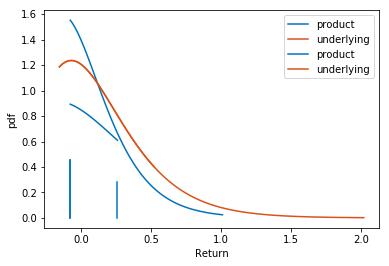

In [8]:
# the uncapped product
hpr_cp(St=640,S0=640,vt=1.03,k=0.95,z=0.8,X1=640,X2=[],c=0,T=3,mu=np.log(1.03),sigma=0.19);

# the capped product
hpr_cp(St=640,S0=640,vt=1.03,k=0.95,z=1.3907,X1=640,X2=1.25*640,c=-0.05+0.25*1.3907,T=3,mu=np.log(1.03),sigma=0.19);

If the pdf $f_{R^c}$ of the log-returns is known we are able to calculate the return distributions explicitly and hence have access to any measure of interest (expected value, quantiles (VaR), moments etc.) of these distributions without simulation. In particular, the expected return $\mu_{\rm cp}$ and the variance $\sigma^2_{R_{\rm cp}}$ of the uncapped product becomes 

\begin{eqnarray*}
\mu_{\rm cp} & = & \mathbb{E}[R_{{\rm cp},t,T}]=\int_\alpha^\infty xf_{R_{\rm cp}}(x){\rm d}x+p_1\alpha\\
\sigma^2_{R_{\rm cp}} & = & \mathbb{E}[(R_{{\rm cp},t,T}-\mu_{\rm cp} )^2] \\
& = & \int_{\alpha}^\infty x^2f_{R_{\rm cp}}(x){\rm d}x+\alpha^2p_1-\mu_{\rm cp}^2\;.
\end{eqnarray*}

Likewise, we have for the capped product

\begin{eqnarray*}
\mu_{\rm ccp} & = & \mathbb{E}[R_{{\rm ccp},t,T}]=\int_\alpha^\beta xf_{R_{\rm ccp}}(x){\rm d}x+p_1\alpha+p_2\beta\\
\sigma^2_{R_{\rm ccp}} & = & \mathbb{E}[(R_{{\rm ccp},t,T}-\mu_{\rm ccp} )^2] \\
& = & \int_{\alpha}^\beta x^2f_{R_{\rm ccp}}(x){\rm d}x+\alpha^2p_1+\beta^2p_2-\mu_{\rm ccp}^2\;.
\end{eqnarray*}

In case that the log-returns of the underlying are normal, all the above integrals can be calculated analytically. However, for more realistic distributions, these integrals can only be evaluated numerically. In Python this can be accomplished using <span style="color:orange">quad</span>. We use the self-written Python function <span style="color:orange">hpr_cp.py</span> to calculate the expected return and the volatility of (capped or uncapped) capital protection products. As an example, consider the uncapped capital protection product above. Using <span style="color:orange">hpr_cp.py</span> we then obtain $\mathbb{E}[R_{{\rm cp},t,T}]\doteq 0.0684$ and $\sigma_{R_{\rm cp}}\doteq 0.2213$.

(0.06835535284841783, 0.22126247761562073)

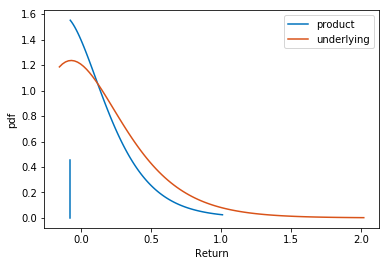

In [9]:
# the uncapped product
hpr_cp(St=640,S0=640,vt=1.03,k=0.95,z=0.8,X1=640,X2=[],c=0,T=3,mu=np.log(1.03),sigma=0.19)

Likewise, for the capped product from above

(0.058809149689886014, 0.1500477220664651)

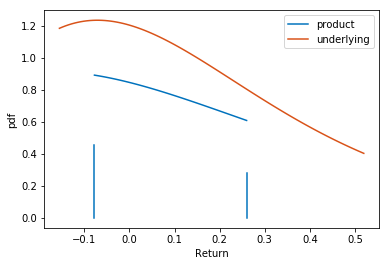

In [10]:
# the capped product
hpr_cp(St=640,S0=640,vt=1.03,k=0.95,z=1.3907,X1=640,X2=1.25*640,c=-0.05+0.25*1.3907,T=3,mu=np.log(1.03),sigma=0.19)